In [ ]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from PIL import Image
from sklearn.utils import shuffle
from keras.applications.vgg16 import VGG16, preprocess_input
import os
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from PIL import ImageOps
from scipy import ndimage

Using TensorFlow backend.


In [2]:
yes_img=glob.glob('C:/Users/Jamie/Downloads/brain_mri/yes/*')

no_img=glob.glob('C:/Users/Jamie/Downloads/brain_mri/no/*')

In [3]:
x_no=[]
y_no=[]
for i in range(len(no_img)):
    no=0
    im=cv2.imread(no_img[i])
    im = cv2.resize(im, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im/255.
    x_no.append(im)
    y_no.append(no)

x_no=np.asarray(x_no)

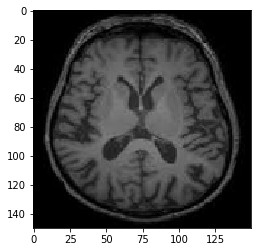

In [4]:
plt.imshow(x_no[1])

In [5]:
x_yes=[]
y_yes=[]
try:
    for k in range(len(yes_img)):
        yes=1
        im1=cv2.imread(yes_img[k])
        im1 = cv2.resize(im1, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        im1 = im1/255
        x_yes.append(im1)
        y_yes.append(yes)

except Exception as e:
    print(str(e))
    
x_yes=np.asarray(x_yes)

(150, 150, 3)
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.97254902 0.97254902 0.97254902]]

 [[0.98431373 0.98431373 0.98431373]
  [0.61176471 0.61176471 0.61176471]
  [0.30196078 0.30196078 0.30196078]
  ...
  [0.29411765 0.29411765 0.29411765]
  [0.61568627 0.61568627 0.61568627]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.49411765 0.49411765 0.49411765]
  [0.0745098  0.0745098  0.0745098 ]
  ...
  [0.07058824 0.07058824 0.07058824]
  [0.48627451 0.48627451 0.48627451]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.49411765 0.49411765 0.49411765]
  [0.0745098  0.0745098  0.0745098 ]
  ...
  [0.05882353 0.05882353 0.05882353]
  [0.48627451 0.48627451 0.48627451]
  [1.         1.         1.        ]]

 [[0.98431373 0.98431373 0.98431373]
  [0.61176471 0.6117647

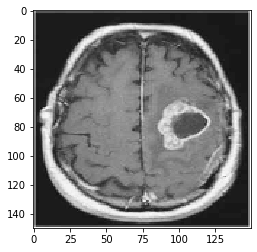

In [6]:
plt.imshow(x_yes[1])
print(x_yes[1].shape)
print(x_yes[1])

In [7]:
x_data=np.concatenate((x_no,x_yes), axis=0)
y_data=np.concatenate((y_no,y_yes), axis=0)

In [8]:
x, y = shuffle(x_data, y_data,random_state=0)


253
253
1
(253, 150, 150, 3)
(253,)


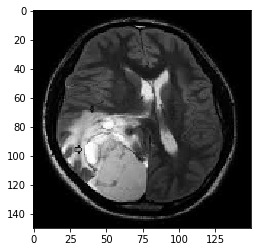

In [9]:
i=2
plt.imshow(x[i])
print(len(x))
print(len(y))
print(y[i])
print(x.shape)
print(y.shape)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=47)

In [11]:
len(x_train)

227

In [12]:
x_val = x_train[:27]
partial_x_train = x_train[27:]
y_val = y_train[:27]
partial_y_train = y_train[27:]

In [13]:
print(len(partial_x_train))
print(len(x_val))
print(len(x_test))


200
27
26


In [14]:
#train_datagen = ImageDataGenerator(rotation_range=15,
#                            width_shift_range=0.1,
#                            height_shift_range=0.1,
#                            shear_range=0.1,
#                            brightness_range=[0.5, 1.5],
#                            horizontal_flip=True,
#                            vertical_flip=True,
#                            preprocessing_function=preprocess_input)
#
#test_datagen = ImageDataGenerator(
#    preprocessing_function=preprocess_input)

#train_generator = train_datagen.flow(
#    partial_x_train,partial_y_train,
    
#    batch_size=32,
#    
#)

#validation_generator = test_datagen.flow(
#    x_val,y_val,
    
#    batch_size=16,
    
#)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(partial_x_train)


In [15]:
from keras import layers
from keras import models

In [ ]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=30,validation_data=(x_val, y_val))
# fits the model on batches with real-time data augmentation:
#history= model.fit_generator(train_datagen.flow(partial_x_train, partial_y_train, batch_size=32),
#                   steps_per_epoch=28, epochs=10 ,validation_data=(x_val, y_val))

In [ ]:
history_dict=history.history
print(history_dict.keys())
print(history_dict)

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=10, batch_size=30)

results = model1.evaluate(x_test, y_test)
results

In [ ]:
x_predict=model1.predict(x_test)

In [ ]:
print(x_predict)

In [ ]:
x_predict1= model1.predict_classes(x_test)

In [ ]:
print(x_predict1)
print(len(x_predict1))

In [ ]:
#i=66
#print('prediction=',x_predict1[i])
#print('true_value=',y_test[i])
#plt.imshow(x_test[i])


In [ ]:


cm = confusion_matrix(y_test, x_predict1)
print(cm)  
score = accuracy_score(y_test, x_predict1)
print(score)



In [ ]:
#model_json = model1.to_json()
#with open("model1.json", "w") as json_file:
#    json_file.write(model_json)
#serialize weights to HDF5
#model1.save_weights("model1.h5")
#print("Saved model to disk")

In [16]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test)
score

Loaded model from disk
26/26 [==============================] - 15s 589ms/step


[0.28441208600997925, 0.9230769276618958]

In [17]:
x_predict1= loaded_model.predict_classes(x_test)
print(x_predict1)
print(len(x_predict1))
cm = confusion_matrix(y_test, x_predict1)
print(cm)  
score = accuracy_score(y_test, x_predict1)
print(score)

[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]
26
[[ 6  0]
 [ 2 18]]
0.9230769230769231


In [18]:
x_predictyes=[]
j=0
for i in range(len(x_test)):
    
    if (x_predict1[j]==1 and y_test[j]==1):
        x_predictyes.append(x_test[j])
    j+=1   
    
x_predictyes=np.asarray(x_predictyes)  
print(len(x_predictyes))

18


float64
(150, 150, 3)
[[[0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]]

 [[0.01176471 0.01176471 0.01176471]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.01960784]]

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.01568627 0.01568627 0.01568627]
  [0.01568627 0.01568627 0.01568627]
  [0.01568627 0.01568627 0.01568627]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.         0.         0.        ]
  [0.         0

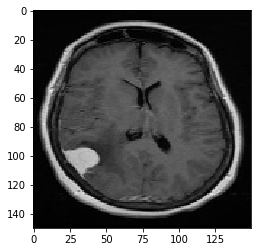

In [19]:
plt.imshow(x_predictyes[17])
print(x_predictyes[17].dtype)
print(x_predictyes[17].shape)
print(x_predictyes[17])

In [20]:
x_imgdata=[]
for i in range(len(x_predictyes)):
    image=x_predictyes[i]
    im2=255 * image
    img = im2.astype(np.uint8)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray,0,255,cv2.THRESH_OTSU)
    ret, markers = cv2.connectedComponents(thresh)
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
    largest_component = np.argmax(marker_area)+1
    brain_mask = markers==largest_component
    brain_out = image.copy()
    brain_out[brain_mask==False] = (0,0,0)
    
    x_imgdata.append(brain_out)
    
x_imgdata=np.asarray(x_imgdata)

In [21]:
def findGreatesContour(contours):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index

In [22]:
result_final=[]
for i in range (len(x_imgdata)):
    im2=255 * x_imgdata[i]
    #kernel = np.ones((5,5),np.uint8)
    #erosion = cv2.erode(im2,kernel,iterations = 1)
    #im2= cv2.dilate(erosion,kernel,iterations = 1)
    img = im2.astype(np.uint8)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #imgray=cv2.GaussianBlur(imgray,(5,5),0)
    
    ret, thresh = cv2.threshold(imgray, 180, 255,0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    largest_area, largest_contour_index = findGreatesContour(contours)

    final1=cv2.drawContours(img, contours, largest_contour_index, (0,0,255), 3)
    
    result_final.append(final1)

result_final=np.asarray(result_final)    

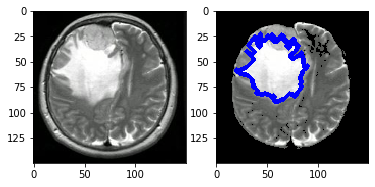

In [43]:
i=14
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_predictyes[i])
f.add_subplot(1,2, 2)
plt.imshow(result_final[i])
plt.show(block=True)

# HSV method

In [45]:
hsv_imgs=[]
for i in range (len(x_predictyes)):
    im2=255 * x_predictyes[i]
    img = im2.astype(np.uint8)
    im_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_hsv=cv2.cvtColor(im_rgb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(im_hsv, (0, 0, 100), (0, 0, 255))
    result = cv2.bitwise_and(im_rgb, im_rgb, mask=mask)
    hsv_imgs.append(result)
hsv_imgs=np.asarray(hsv_imgs)     

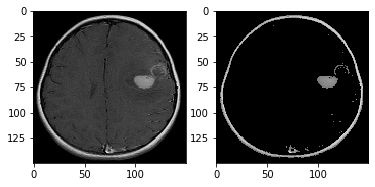

In [104]:
i=9
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_predictyes[i])
f.add_subplot(1,2, 2)
plt.imshow(hsv_imgs[i])
plt.show(block=True)

# Thresholding


In [82]:
from skimage.morphology import disk
from skimage.filters import median

tumor=[]
for i in range(len(x_imgdata)):
    im2=255 * x_imgdata[i]
    img = im2.astype(np.uint8)
    
    gray1= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray1 = cv2.equalizeHist(gray1)
    blur = cv2.GaussianBlur(gray1,(5,5),0)
    _,th1 = cv2.threshold(blur,200,255,cv2.THRESH_BINARY)
    med = median(th1, disk(5))
    
    tumor.append(med)
    
tumor=np.asarray(tumor)

    

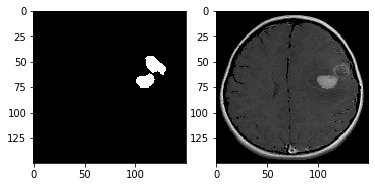

In [103]:
i=9
plt.subplot(121)
plt.imshow(tumor[i],cmap='gray')
plt.subplot(122)
plt.imshow(x_imgdata[i])

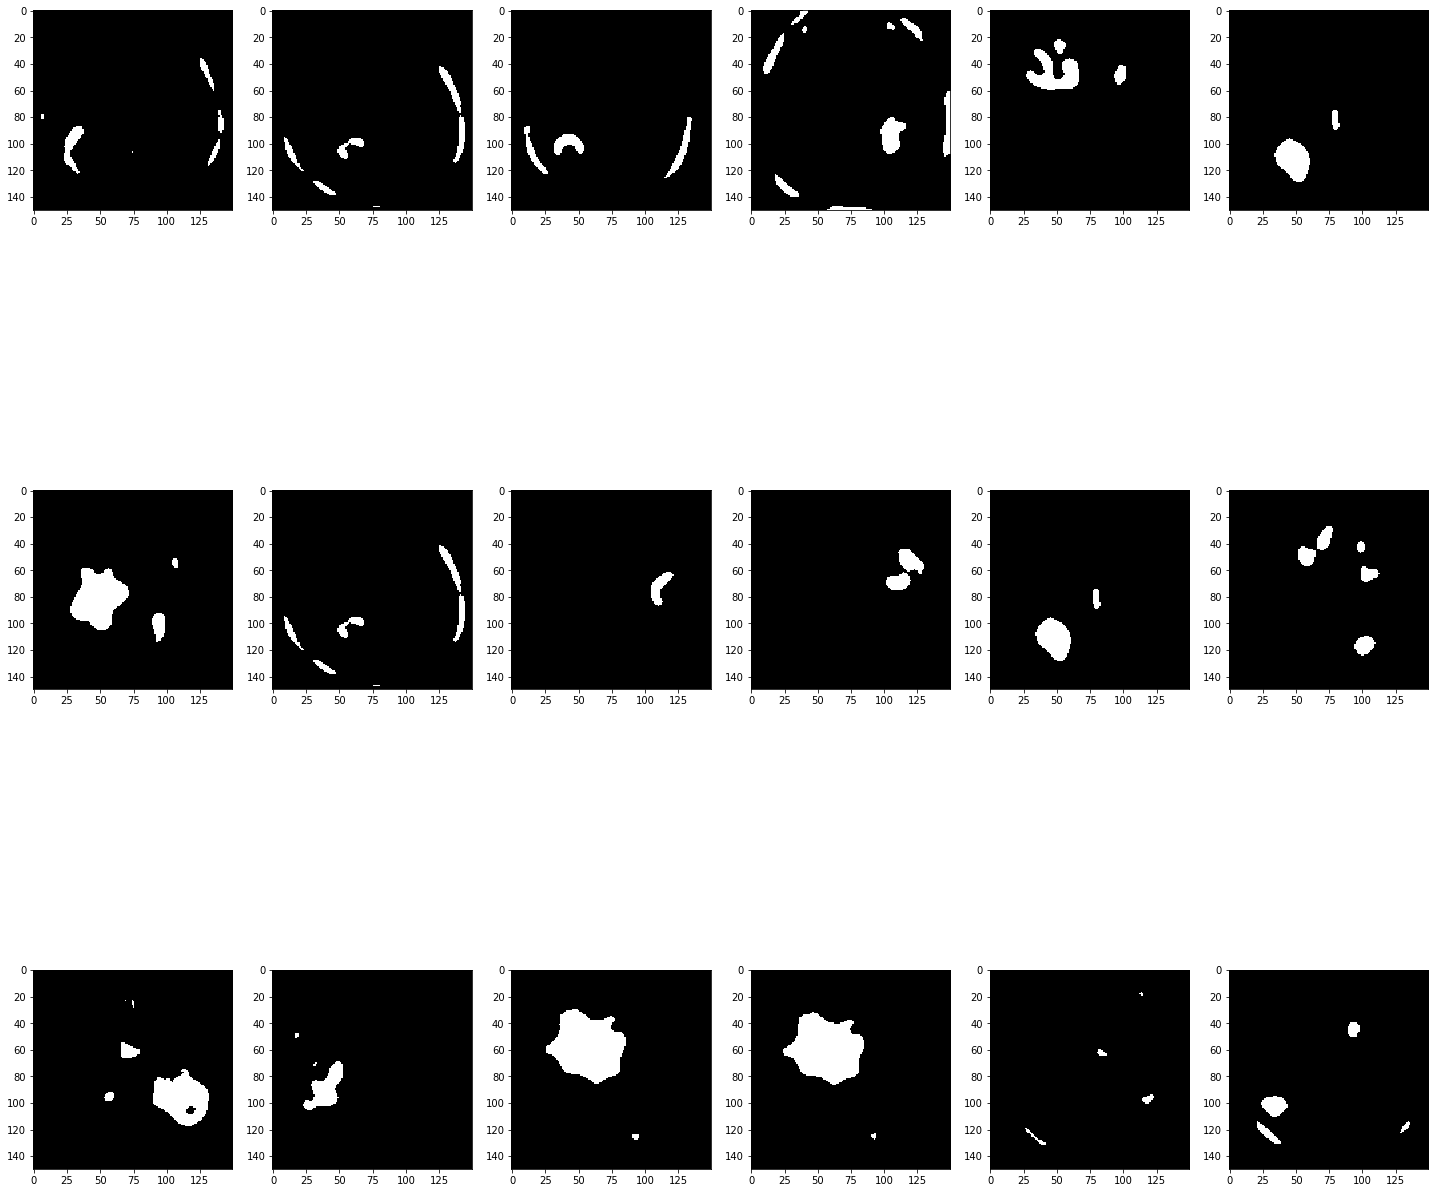

In [28]:
fig, ax = plt.subplots(3, 6, figsize=(25,25))
for i, axi in enumerate(ax.flat):
        axi.imshow(tumor[i], cmap='gray')